### Código LEC2 2024-2

Grupo A 

In [2]:
# Importación de librerías:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

* Pregunta 2.1:

Calcular la integral por método de éxito y fracaso:

$$
\int_{-2}^{2} \int_{-2}^{2} \frac{e^x \cos^2 y}{1 + x^2} \, dx \, dy
$$

a) Realice el proceso 4 veces utilizando $10^2$, $10^5$, $10^7$ y $10^8$  puntos aleatorios respectivamente. Muestre los resultados y comente. 

b) Elija 2 casos del ítem anterior y presente un gráfico para cada uno con el fin de visualizar los puntos de éxito-fracaso del experimento. 

In [3]:
#Definimos la función
def f(x,y): 
    return np.exp(x)*np.cos(y)**2 / (1 + x**2)

# Definimos extremos
x_a, x_b = -2, 2
y_a, y_b = -2, 2

In [4]:

# Definimos el número de puntos para a):
num_puntos = [100, 10000, 10000000, 100000000]

# Aproximación punto máximo:
f_max = 2 

for i in num_puntos:
    # Se calculó con float32 porque me da un error de memoria con float64 para 10^8 puntos
    x_rand = np.random.uniform(x_a, x_b, i).astype(np.float32)
    y_rand = np.random.uniform(y_a, y_b, i).astype(np.float32)
    z_rand = np.random.uniform(0, f_max, i).astype(np.float32)    

    # Contamos los puntos que están debajo de la curva
    exitos = np.sum(z_rand < f(x_rand, y_rand))
    # Calculamos la proporción de puntos debajo de la curva
    proporción = exitos / i
    
    # Calculamos la integral
    integral = proporción * (x_b - x_a) * (y_b - y_a) * f_max
    
    print(f"Con {int(i)} puntos, la integral es aproximadamente {integral:.6f}")


Con 100 puntos, la integral es aproximadamente 7.040000
Con 10000 puntos, la integral es aproximadamente 5.305600
Con 10000000 puntos, la integral es aproximadamente 5.298122
Con 100000000 puntos, la integral es aproximadamente 5.302429


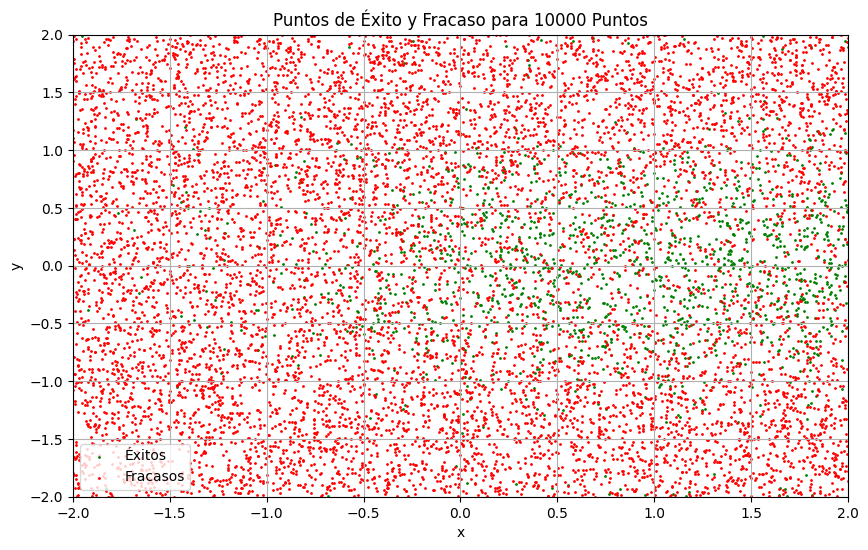

C:\Users\betoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


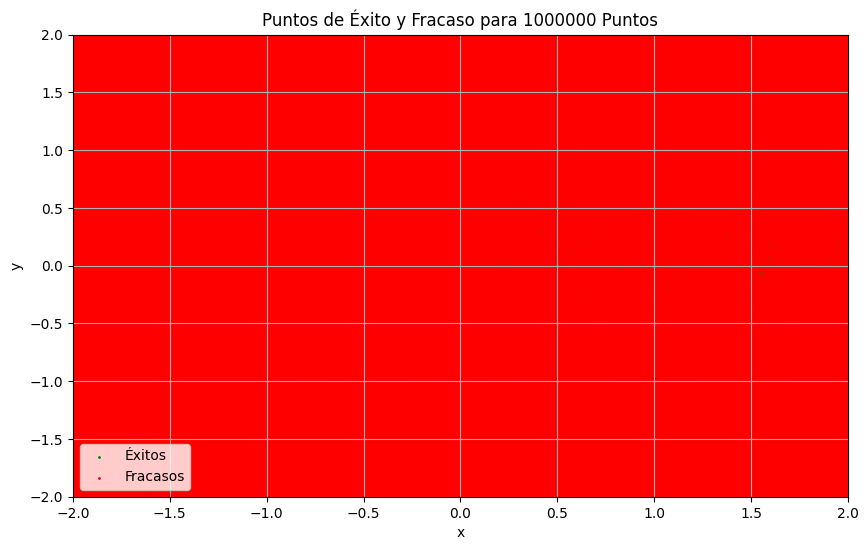

In [5]:
# Gráficos para visualizar el éxito-fracaso

# Definimos el número de puntos para b):
num_puntos = [10000, 1000000]

for i in num_puntos:
    # Generamos puntos aleatorios
    x_rand = np.random.uniform(x_a, x_b, i)
    y_rand = np.random.uniform(y_a, y_b, i)

    
    # Evaluamos la función en los puntos aleatorios
    f_xy = f(x_rand, y_rand) 
    
    # Obtenemos el máximo de la función
    f_max = np.max(f_xy)  
    
    # Generamos valores aleatorios para compar
    z_rand = np.random.uniform(0, f_max, i)

    # Comparamos los valores de la función con los valores aleatorios
    exitos = z_rand < (f_xy / np.max(f_xy))
    
    # Graficamos los puntos de éxito y fracaso
    plt.figure(figsize=(10, 6))
    plt.scatter(x_rand[exitos], y_rand[exitos], color='green', s=1, label='Éxitos')
    plt.scatter(x_rand[~exitos], y_rand[~exitos], color='red', s=1, label='Fracasos')
    plt.title(f'Puntos de Éxito y Fracaso para {i} Puntos')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(x_a, x_b)
    plt.ylim(y_a, y_b)
    plt.legend()
    plt.grid()
    plt.show()

* Pregunta 2.2:

Tareas: 

1. T1 - Diseño de la nave: tiempo aleatorio uniforme entre 200 y 300 horas.
2. T2 - Construcción del motor principal: tiempo aleatorio uniforme entre 150 y 250
horas.
3. T3 - Desarrollo de sistemas de navegación: tiempo aleatorio uniforme entre 120 y 180
horas.
4. T4 - Pruebas del motor: tiempo aleatorio uniforme entre 60 y 100 horas. Posee una
probabilidad de fallo del 40 % (si falla, se debe repetir T2 y T4).
5. T5 - Instalación paneles solares: tiempo aleatorio uniforme entre 40 y 80 horas.
6. T6 - Pruebas sistema de navegación: tiempo aleatorio uniforme entre 50 y 90 horas.
Posee una probabilidad de fallo del 35 % (si falla, se debe repetir T3 y T6).
7. T7 - Ensamblaje final: tiempo aleatorio uniforme entre 100 y 150 horas.
8. T8 - Revisión pre-lanzamiento: tiempo aleatorio uniforme entre 30 y 60 horas.
9. T9 - Carga combustible: tiempo aleatorio uniforme entre 15 y 30 horas.
10. T10 - Entrenamiento del equipo de rescate: tiempo aleatorio uniforme entre 150 y 160
horas.

Dependencias:

1. T2, T3 y T5 dependen de la finalización de T1.
2. T4 depende de la finalización de T2.
3. T6 depende de la finalización de T3.
4. T7 depende de la finalización de T4, T5 y T6.
5. T9 depende de la finalización de T7.
6. T10 depende de la finalización de T1 y debe completarse antes de T8.
7. T8 solo puede comenzar después de que se hayan completado T7, T9 y T10.


b) Implemente una función en Python que sea capaz de simular el problema y retornar
las horas que se necesitaron para realizar la preparación. Explique su implementación
y cómo consideró las restricciones entre las tareas

In [6]:
def mision_espacial():   
    total = 0
    total_tiempos = []

    # Tarea 1
    total_tiempos.append(np.random.uniform(200, 300))  # T1

    # Tareas 2, 3, 5 y 10 dependen de T1
    total_tiempos.append(np.random.uniform(150, 250))  # T2
    total_tiempos.append(np.random.uniform(120, 180))  # T3
    total_tiempos.append(np.random.uniform(40, 80))    # T5
    total_tiempos.append(np.random.uniform(150, 160))  # T10

    # T4 depende de T2 y tiene 40% de probabilidad de fallar
    while True:
        if np.random.rand() < 0.4:  # Fallo
            # Repetir T2 y T3 si falla T4
            total_tiempos[-3] = np.random.uniform(150, 250)  # T2
            total_tiempos[-2] = np.random.uniform(120, 180)  # T3
        else:
            total_tiempos.append(np.random.uniform(60, 100))  # T4
            break

        # T6 depende de T3 y tiene 35% de probabilidad de fallar
    while True:
        if np.random.rand() < 0.35:  # Fallo
            # Repetir T3 y T6 si falla T6
            total_tiempos[-2] = np.random.uniform(120, 180)  # T3
            total_tiempos.append(np.random.uniform(50, 90))  # T6
        else:
            total_tiempos.append(np.random.uniform(50, 90))  # T6
            break

    # Tareas que no tienen dependencias
    total_tiempos.append(np.random.uniform(100, 150))   # T7
    total_tiempos.append(np.random.uniform(15, 30))     # T9
    total_tiempos.append(np.random.uniform(30, 60))     # T8

    # Cálculo del tiempo total
    total = sum(total_tiempos)
    return total

In [7]:
# Definimos el tiempo total
total = mision_espacial()
# El tiempo total es
print(f"El tiempo total es de {total:.2f} horas")

El tiempo total es de 1220.88 horas


c) Simule aplicando Montecarlo para obtener una estimación sobre el tiempo total requerido para completar las tareas necesarias para la misión. Realice 10, 100, 1000, 10000 simulaciones. Dentro de cada conjunto de simulaciones informe: máximo, mínimo, media, desviación estándar

In [8]:
# Definimos número de simulaciones
n_sim = [10, 100, 1000, 10000]

# Los resultados se irán añadiendo aquí
resultados = {}
tiempos_sim = {}

for n in n_sim:
    # Realizamos n simulaciones
    tiempos = [mision_espacial() for _ in range(n)]
    # Máximo, mínimo, media y desviación estándar
    maximo = np.max(tiempos)
    minimo = np.min(tiempos)
    media = np.mean(tiempos)
    desv = np.std(tiempos)
    resultados[n] = (maximo, minimo, media, desv)
    tiempos_sim[n] = tiempos

# Mostramos los resultados
for n, (maximo, minimo, media, desv) in resultados.items():
    print(f"Para {n} simulaciones:")
    print(f"Tiempo máximo: {maximo:.2f}")
    print(f"Tiempo mínimo: {minimo:.2f}")
    print(f"Tiempo promedio: {media:.2f}")
    print(f"Desviación estándar: {desv:.2f}")
    print()
    

Para 10 simulaciones:
Tiempo máximo: 1389.78
Tiempo mínimo: 1162.53
Tiempo promedio: 1266.43
Desviación estándar: 74.35

Para 100 simulaciones:
Tiempo máximo: 1746.95
Tiempo mínimo: 1034.59
Tiempo promedio: 1242.07
Desviación estándar: 120.64

Para 1000 simulaciones:
Tiempo máximo: 2159.29
Tiempo mínimo: 1020.01
Tiempo promedio: 1265.41
Desviación estándar: 142.29

Para 10000 simulaciones:
Tiempo máximo: 2208.19
Tiempo mínimo: 996.81
Tiempo promedio: 1262.38
Desviación estándar: 134.22



d) Grafique las distribuciones de los tiempos simulados para la misión. Investigue la ley
de los grandes números junto con el teorema central del límite y comente sobre el
comportamiento de los gráficos. 

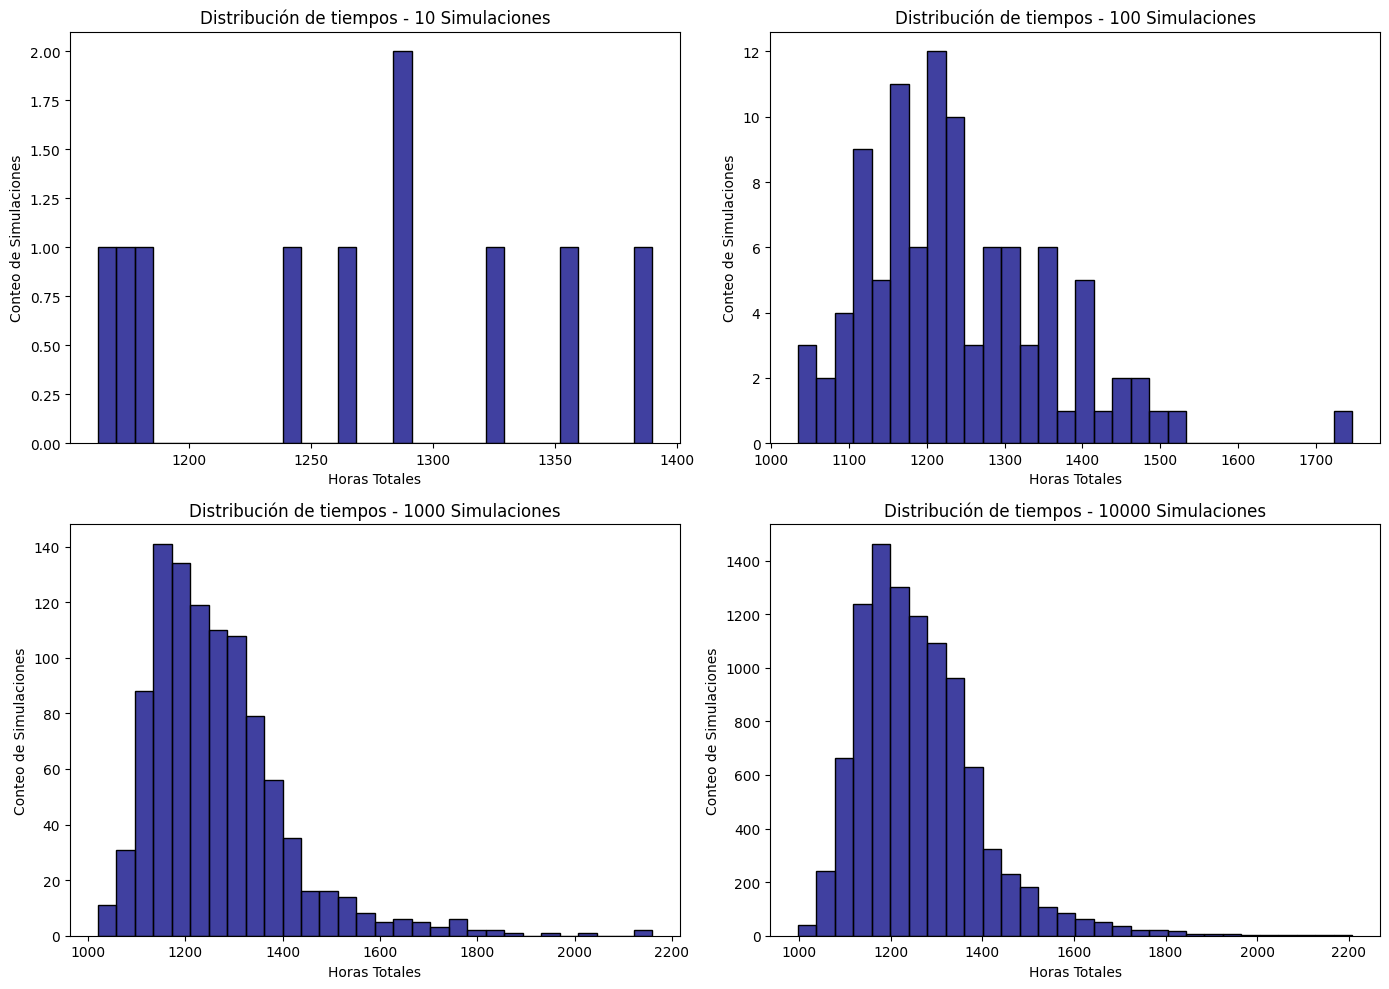

In [9]:
# Graficar distribucion de tiempos por simulación
plt.figure(figsize=(14, 10))

for i, n in enumerate(n_sim):
    plt.subplot(2, 2, i + 1)
    sns.histplot(tiempos_sim[n], bins=30, kde=False, color = "navy")
    plt.title(f'Distribución de tiempos - {n} Simulaciones')
    plt.xlabel('Horas Totales')
    plt.ylabel('Conteo de Simulaciones')
plt.tight_layout()
plt.show()

* Pregunta 2.3

a) Simule el problema implementando una función en Python que retorne la probabilidad de que Romeo y Julieta se encuentren aplicando el método de Montecarlo, dado
un tiempo de retraso máximo A, un tiempo de espera B y un número de simulaciones.


In [10]:
def probabilidad_encuentro(A, B, simulaciones):
    encuentros = 0 
    
    # Ciclo que se repite para hacer las simulaciones
    for _ in range(simulaciones):
        # Generar tiempos aleatorios para Romeo y Julieta
        llegada_romeo = random.uniform(0, A)
        llegada_julieta = random.uniform(0, A)
        
        # Ver si se encuentran
        if abs(llegada_romeo - llegada_julieta) <= B:
            encuentros += 1  # Incrementa el contador de encuentros si se encuentran
    
    # Calcular la probabilidad dividiendo los encuentros entre el número total de simulaciones
    probabilidad = encuentros / simulaciones
    return probabilidad


b) ¿Cuál es la probabilidad de que Romeo y Julieta se encuentren si cada uno se retrasa
entre 0 y 1 hora, y la primera persona en llegar espera 30 minutos? Realice desde 1 a
1000 simulaciones aplicando Montecarlo y grafique la probabilidad de encuentro en
función del número de simulaciones. Comente.

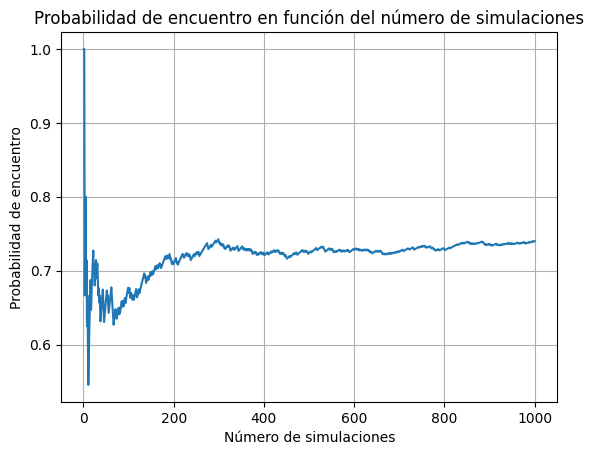

In [11]:
#Misma funcion que en la letra a solo que esta entrega una lista
def lista_probabilidades(A, B, simulaciones):
    probabilidades = []  # Lista para almacenar probabilidades en cada simulación
    n_encuentros = 0  
    
    llegada_romeo = np.random.uniform(0, A, simulaciones)
    llegada_julieta = np.random.uniform(0, A, simulaciones)

    for simulacion in range(1, n_simulaciones + 1):
        # Verificar si se encuentran en esta simulación
        if abs(llegada_romeo[simulacion - 1] - llegada_julieta[simulacion - 1]) <= B:
            n_encuentros += 1  # Incrementar contador de encuentros
        
        # Calcular la probabilidad en cada simulación
        probabilidad = n_encuentros / simulacion
        probabilidades.append(probabilidad)

    return probabilidades

# Parámetros
A = 1  
B = 0.5 
n_simulaciones = 1000  

probabilidades = lista_probabilidades(A, B, n_simulaciones)

# Graficar los resultados
plt.plot(range(1, n_simulaciones + 1), probabilidades)
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad de encuentro')
plt.title('Probabilidad de encuentro en función del número de simulaciones')
plt.grid(True)
plt.show()

c) Romeo y Julieta estiman que se retrasarán entre 0 y 1 hora, y el tiempo de espera variará
entre 25 y 35 minutos. Realice 1000 simulaciones aplicando Montecarlo y grafique la
probabilidad de encuentro en función del tiempo de espera. Comente.

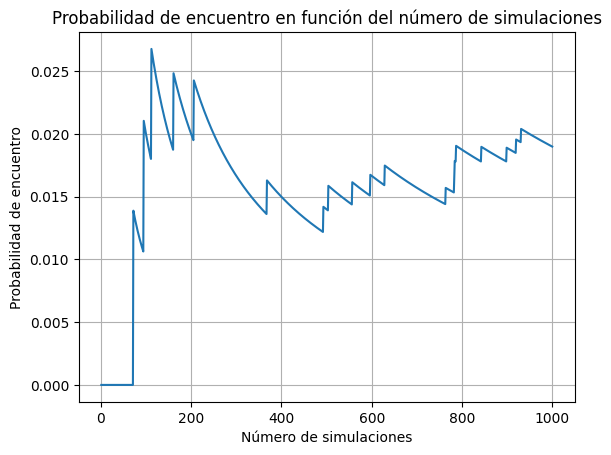

In [12]:
#Modificamos un poco la función para que el tiempo sea evaluado en minutos.
def probabilidad_encuentro(A, B, num_simulaciones):
    exitos = 0  # Contador de encuentros exitosos
    
    for _ in range(num_simulaciones):
        tiempo_romeo = np.random.uniform(0, A*60 )
        tiempo_julieta = np.random.uniform(0, A*60 )
        if abs(tiempo_romeo - tiempo_julieta) <= B:
            exitos += 1
    probabilidad_encuentro = exitos / num_simulaciones
    return probabilidad_encuentro

# Parámetros
A = 1                       
num_simulaciones = 1000

# Lista de tiempos de espera B entre 25 y 35 minutos
tiempos_espera = np.arange(25, 36, 1)
probabilidades = []

# Simulamos para cada tiempo de espera
for B in tiempos_espera:
    probabilidad = probabilidad_encuentro(A, B, num_simulaciones)
    probabilidades.append(probabilidad)

# Graficamos los resultados
plt.plot(tiempos_espera, probabilidades, marker='o', linestyle='-', color='b')
plt.title('Probabilidad de encuentro en función del tiempo de espera')
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Probabilidad de encuentro')
plt.grid(True)
plt.show()

d) Romeo y Julieta deciden que la primera persona en llegar esperará por 30 minutos
a la segunda persona y que el tiempo de retraso máximo debería variar entre 1 y 2
horas. Realice 1000 simulaciones aplicando Montecarlo y grafique la probabilidad de
encuentro en función del tiempo de retraso máximo. Comente

In [ ]:
# Con la misma función anterior.
B = 30  # Tiempo de espera fijo en 30 minutos
num_simulaciones = 1000  # Número de simulaciones

# Lista de tiempos de retraso máximo A entre 1 y 2 horas
tiempos_retraso = np.arange(1, 2.1, 0.1)  # De 1 a 2 horas, con pasos de 0.1
probabilidades = []

# Simulamos para cada tiempo de retraso máximo
for A in tiempos_retraso:
    probabilidad = probabilidad_encuentro(A, B, num_simulaciones)
    probabilidades.append(probabilidad)

# Graficamos los resultados
plt.plot(tiempos_retraso, probabilidades, marker='o', linestyle='-', color='g')
plt.title('Probabilidad de encuentro en función del tiempo de retraso máximo')
plt.xlabel('Tiempo de retraso máximo (horas)')
plt.ylabel('Probabilidad de encuentro')
plt.grid(True)
plt.show()

* Pregunta 2.4:

a) Simule el problema implementando una función en Python que retorne la cantidad
de movimientos promedio para que el caballo regrese a su posición original aplicando
el método de Montecarlo, dado un número de simulaciones. Explique su implementación.

b) Para 100 simulaciones, calcule la varianza de los movimientos promedio que se requieren para que el caballo regrese a su posición inicial. En el contexto del problema y
los caminos aleatorios, ¿qué indica este valor y cómo se interpreta? 

In [13]:
mov_caballo = [(2, 1), (2, -1), (-2, 1), (-2, -1),(1, 2), (1, -2), (-1, 2), (-1, -2)]

def mov_valido(x, y):
    return 0 <= x < 8 and 0 <= y < 8

def simulacion():
    x_inicial = random.randint(0, 7)
    y_inicial = random.randint(0, 7)
    x= x_inicial
    y= y_inicial
    movs=0

    while True:
        mov_x, mov_y = random.choice(mov_caballo)
        nuevo_x = x + mov_x
        nuevo_y = y + mov_y

        if mov_valido(nuevo_x, nuevo_y):
            x = nuevo_x
            y = nuevo_y
            movs = movs + 1

            if (x, y) == (x_inicial, y_inicial):
                break
    
    return movs

def varianza(resultados, prom):
    var = sum((x - prom)**2 for x in resultados) / len(resultados)
    return var

def prom_varianza(num_sims):
    resultados = []

    for _ in range(num_sims):
        movimientos = simulacion()
        resultados.append(movimientos)
    
    prom = sum(resultados) / len(resultados)
    
    var = varianza(resultados, prom)
    
    return prom, var


num_sims = int(input("Ingrese numero de simulaciones: "))
prom, var = prom_varianza(num_sims)
print(f"El promedio de movimientos del caballo es: {prom:.2f}")
print(f"La varianza es: {var:.2f}")